## Visualisasi Menengah 1

## Exploring Datasets with _pandas_ and Matplotlib

### Downloading and Prepping Data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import seaborn as sns

mpl.style.use('ggplot')
pd.set_option('max_columns', None)

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
df_can = pd.read_excel('Canada.xlsx',
                      sheet_name='Canada by Citizenship', 
                      skiprows=range(20),
                      skipfooter=2)

print('Data Downloaded and read into a dataframe!')

Data Downloaded and read into a dataframe!


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [5]:
print(df_can.shape)

(195, 43)


In [6]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

df_can.rename(columns = {'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

df_can.columns = list(map(str,df_can.columns))

df_can.set_index('Country', inplace=True)

df_can['Total'] = df_can.sum(axis=1)

years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


## Visualizing Data using Matplotlib

In [7]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print('Matplotlib version:', mpl.__version__)

Matplotlib version: 3.3.4


### Waffle Charts (Optional)

In [8]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140,5866


In [9]:
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

for i, proportion in enumerate(category_proportions): 
    print(df_dsn.index.values[i] + ': ' + str(proportion))
    

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [10]:
width = 40
height = 10 
total_num_tiles = width * height 
print('Total number of tiles is', total_num_tiles)

Total number of tiles is 400


In [11]:
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category): 
    print(df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [12]:
waffle_chart = np.zeros((height, width))

category_index = 0 
tile_index = 0 

for col in range(width):
    for row in range(height): 
        tile_index += 1 
        
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
            
        waffle_chart[row, col] = category_index
print('Waffle chart populated!')

Waffle chart populated!


In [13]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

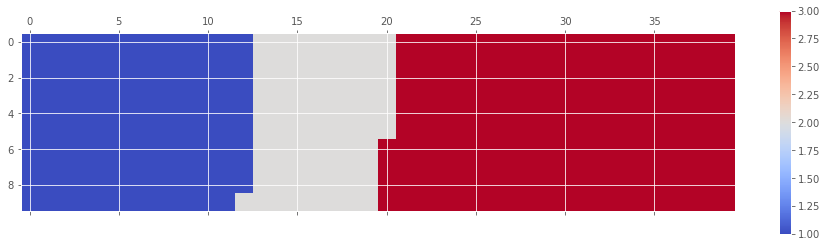

In [14]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 432x288 with 0 Axes>

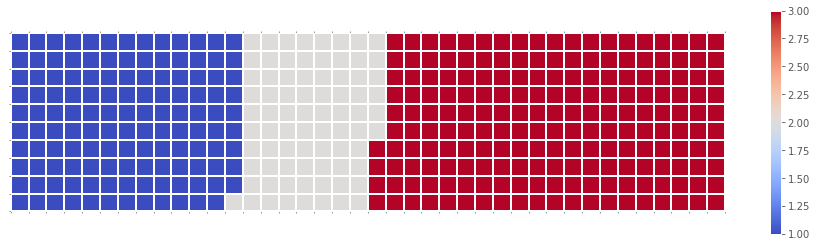

In [15]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 432x288 with 0 Axes>

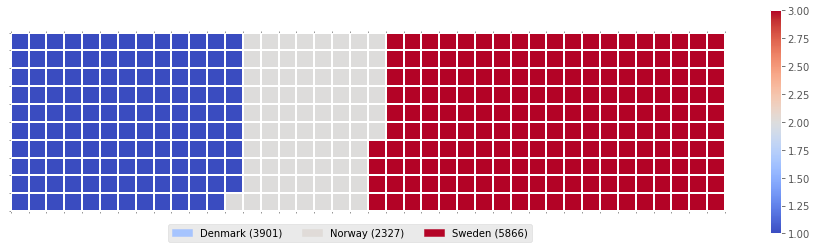

In [16]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

legend_handles = [] 
for i, category in enumerate(df_dsn.index.values): 
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, 
label=label_str))
    
plt.legend(handles=legend_handles,
          loc='lower center',
          ncol=len(df_dsn.index.values),
          bbox_to_anchor=(0., -0.2, 0.95, .1)
          )    

In [17]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign='', ): 
    
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]
    
    total_num_tiles = width * height 
    print('Total number of tiles is', total_num_tiles) 
    
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
    
    for i, tiles in enumerate(tiles_per_category): 
        print(df_dsn.index.values[i] + ': ' + str(tiles))
        
    waffle_chart = np.zeros((height, width))
    
    category_index = 0 
    tile_index = 0 
    
    for col in range(width): 
        for row in range(height): 
            tile_index += 1 
            
            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1
            
        waffle_chart[row, col] = category_index 
        
    fig = plt.figure() 
    
    colormap = plt.cm.coolwarm 
    plt.matshow(waffle_chart, cmap=colormap) 
    plt.colorbar()
    
    ax = plt.gca() 
    
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    
    plt.xticks([])
    plt.yticks([])
    
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]
    
    legend_handles = [] 
    for i, category in enumerate(categories): 
        if value_sign == '%': 
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
            color_val = colormap(float(values_cumsum[i])/total_values)
            legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
            
    plt.legend( 
        handles=legend_handles, 
        loc='lower center', 
        ncol=len(categories), 
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [18]:
width = 40 
height = 10 
categories = df_dsn.index.values 
values = df_dsn['Total']
colormap = plt.cm.coolwarm

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

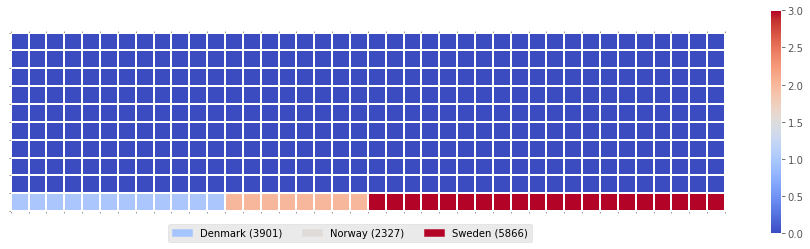

In [19]:
create_waffle_chart(categories, values, height, width, colormap)

### Word Clouds

In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [21]:
from wordcloud import WordCloud, STOPWORDS
print('Wordcloud is installed and imported')

Wordcloud is installed and imported


In [22]:
import urllib
url = 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt'
content = urllib.request.urlopen(url) 
alice_novel = content.read().decode('utf8')

In [23]:
stopwords = set(STOPWORDS)

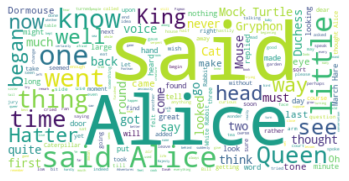

In [24]:
alice_wc = WordCloud(background_color='white',
                     max_words=2000,
                     stopwords=stopwords)

alice_wc.generate(alice_novel)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

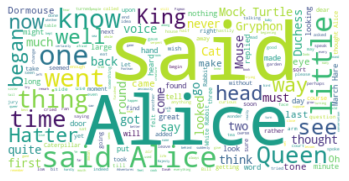

In [25]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

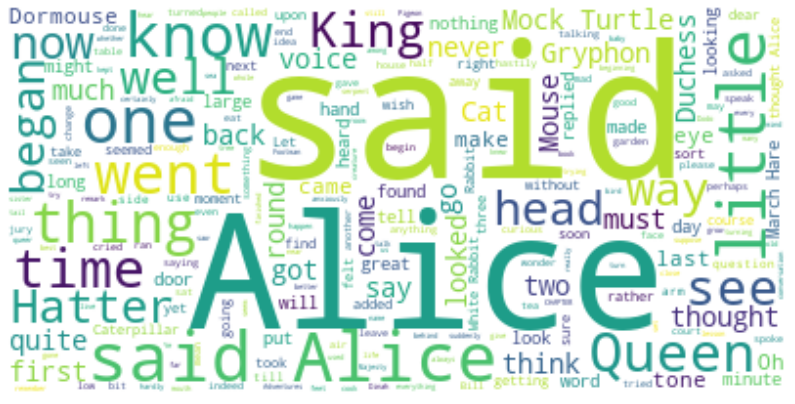

In [26]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

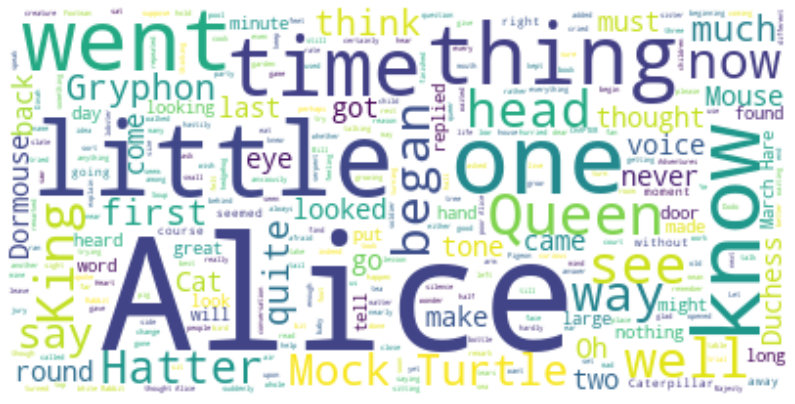

In [27]:
stopwords.add('said')
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
mask = np.array(Image.open('alice_mask.png')) 
print('Image downloaded and saved!')

Image downloaded and saved!


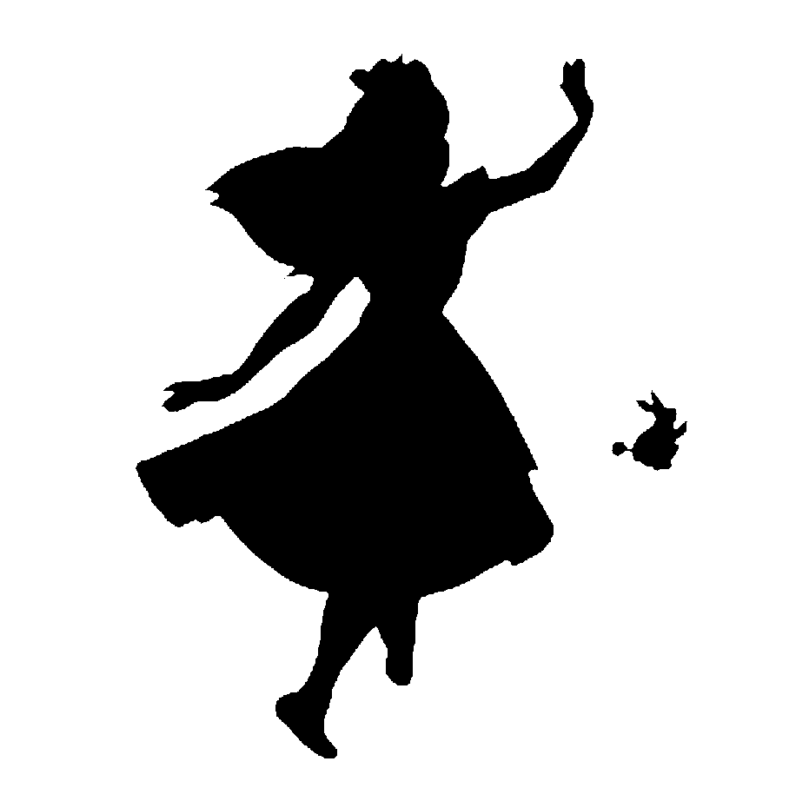

In [29]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(mask,cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

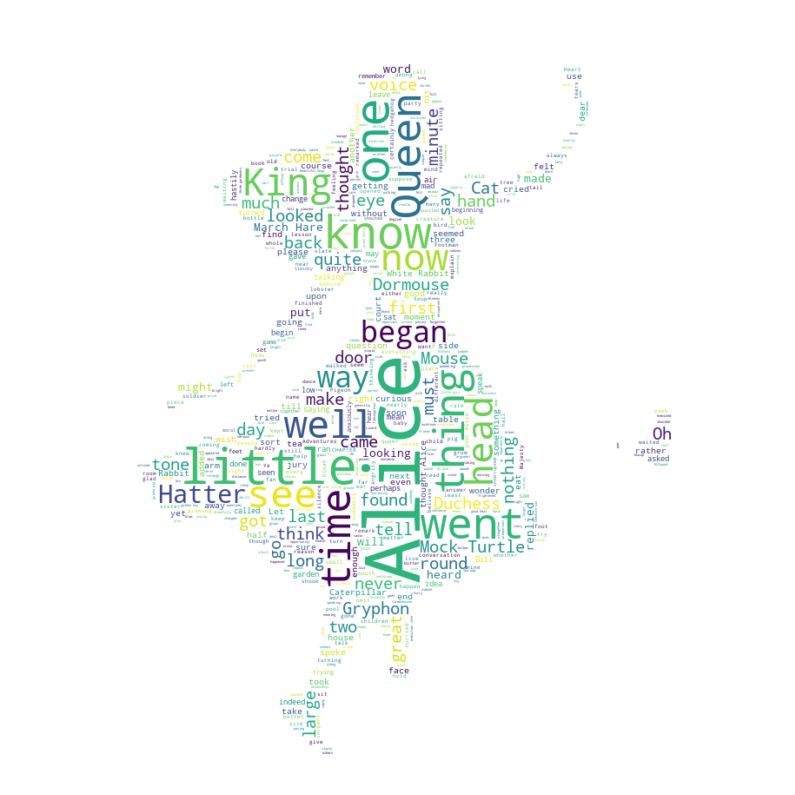

In [30]:
alice_wc = WordCloud(background_color='white', max_words=2000, mask = np.array(Image.open('alice_mask.png')), stopwords=stopwords)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [32]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [33]:
max_words = 90 
word_string = '' 
for country in df_can.index.values: 
    if len(country.split(' ')) == 1: 
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
        
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [34]:
wordcloud = WordCloud(background_color='white').generate(word_string)
print(' Word cloud created')

 Word cloud created


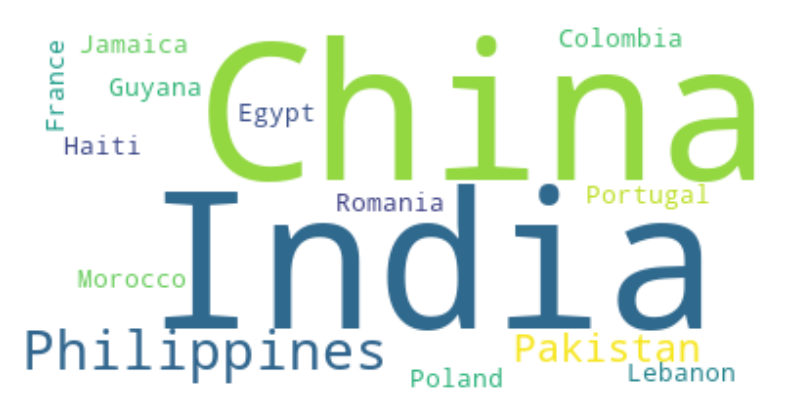

In [35]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Regression Plots

In [36]:
!pip install seaborn

In [37]:
import seaborn as sns 
print('Seaborn installed and imported')

Seaborn installed and imported


In [38]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(float,df_tot.index)

df_tot.reset_index(inplace=True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


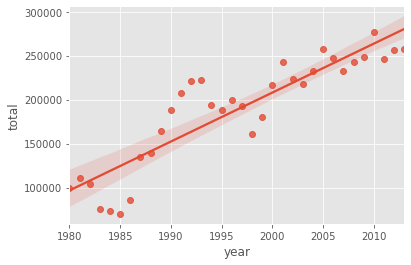

In [39]:
import seaborn as sns 
ax = sns.regplot(x='year', y='total', data=df_tot)

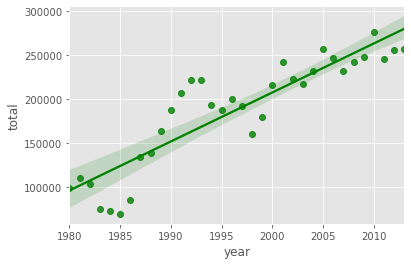

In [40]:
import seaborn as sns 
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

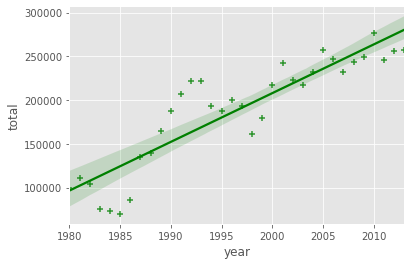

In [41]:
import seaborn as sns 
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

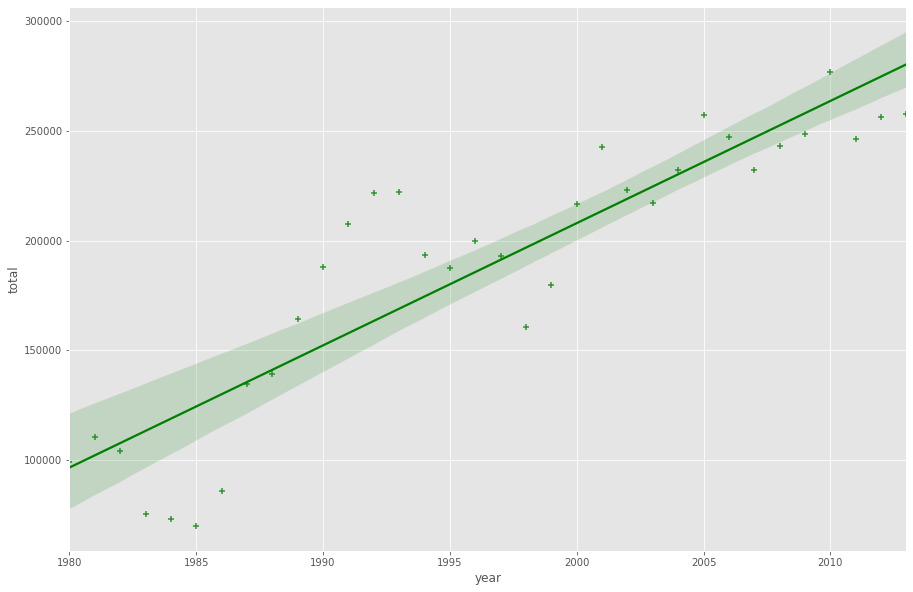

In [42]:
plt.figure(figsize=(15, 10)) 
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

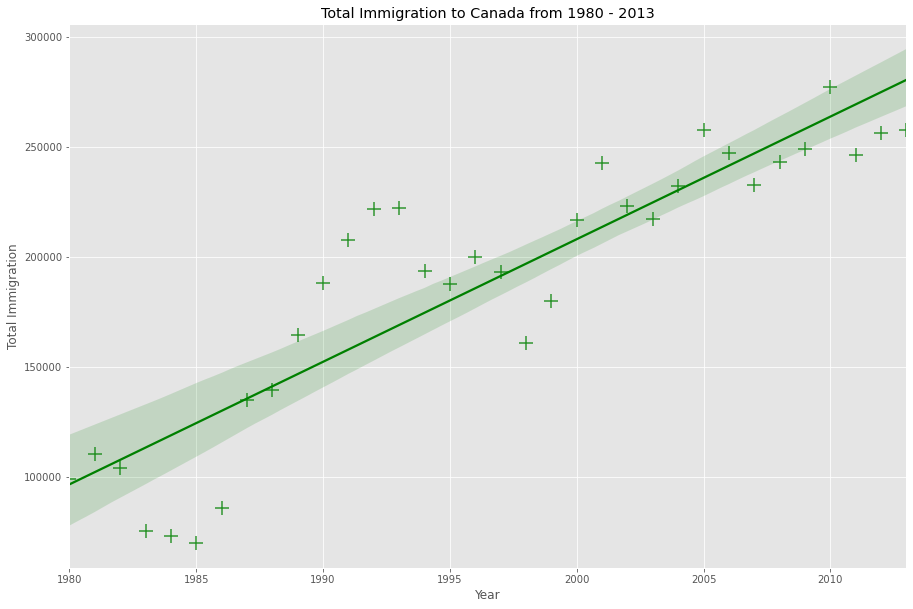

In [43]:
plt.figure(figsize=(15, 10)) 
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')

ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

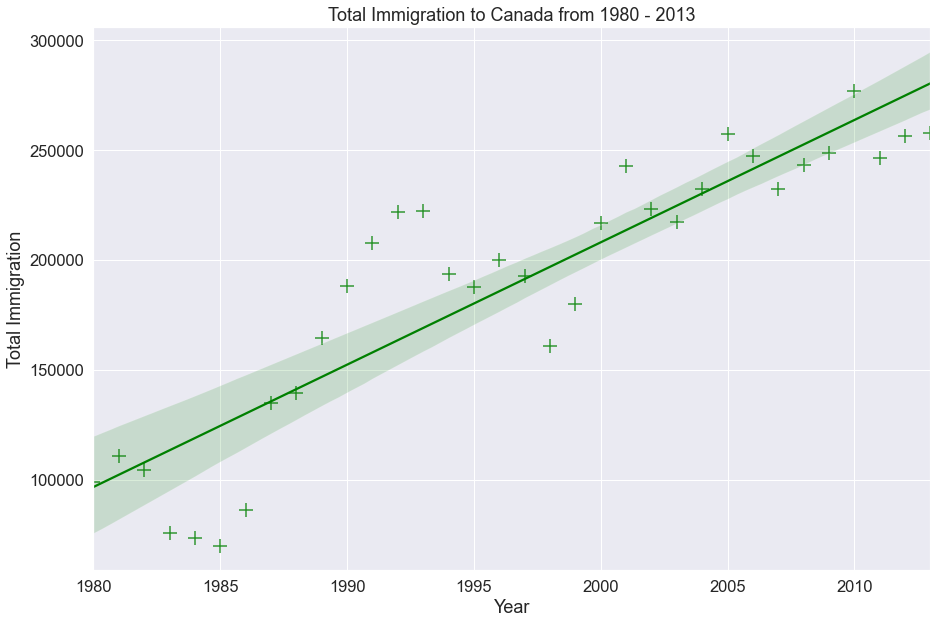

In [44]:
plt.figure(figsize=(15, 10)) 

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')

ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

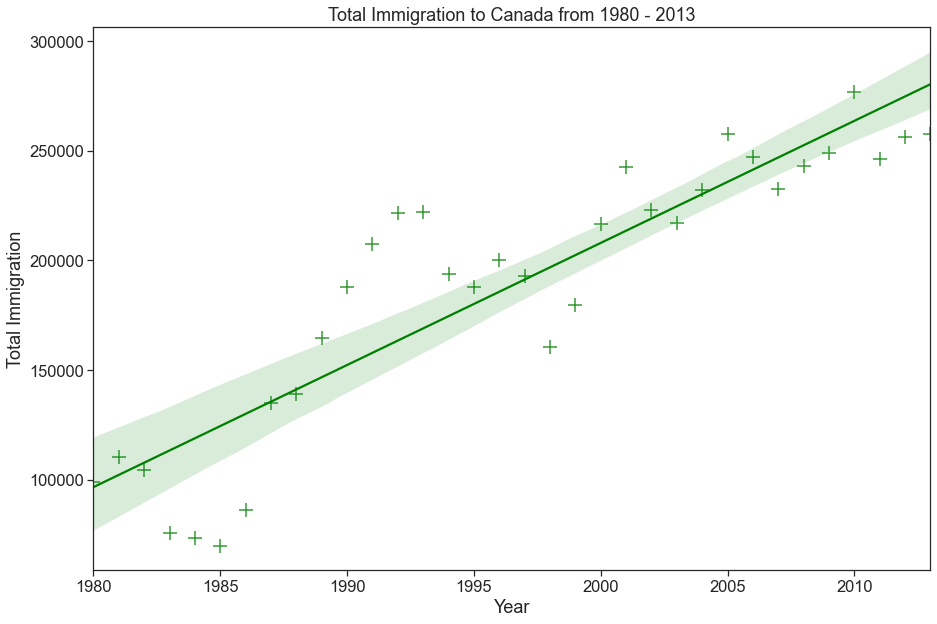

In [45]:
plt.figure(figsize=(15, 10)) 

sns.set(font_scale=1.5)
sns.set_style('ticks')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')

ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

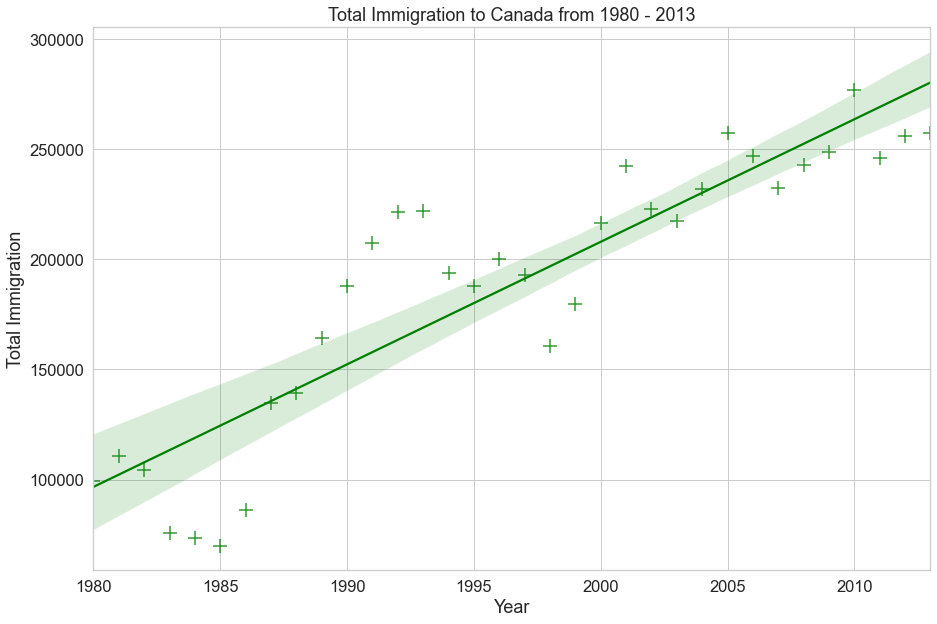

In [46]:
plt.figure(figsize=(15, 10)) 

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')

ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

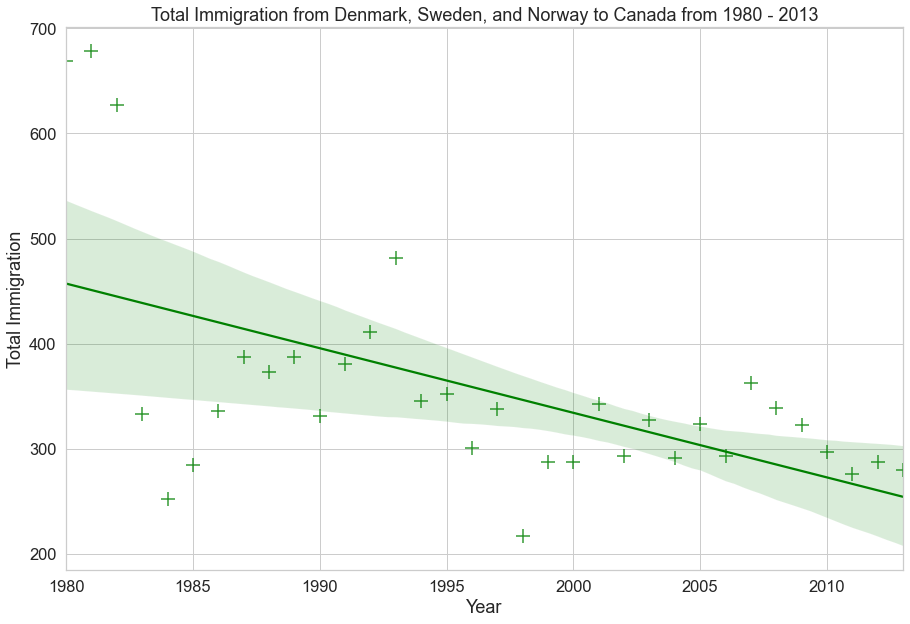

In [47]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

df_total = pd.DataFrame(df_countries.sum(axis=1))

df_total.reset_index(inplace=True)

df_total.columns = ['year', 'total']

df_total['year'] = df_total['year'].astype(int)

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

## Visualisasi Menengah 2 

## Exploring Datasets with _pandas_ and Matplotlib

### Downloading and Prepping Data

In [48]:
import numpy as np 
import pandas as pd 

### Introduction to Folium

In [49]:
!pip install folium 

In [50]:
import folium 
print('Folium installed and imported')

Folium installed and imported


In [51]:
world_map = folium.Map()
world_map 

In [52]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)
world_map

In [53]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=11)
world_map

In [54]:
world_map = folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)
world_map

### A. Stamen Toner Maps

In [55]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=13, tiles='Stamen Toner')
world_map

### B. Stamen Terrain Maps

In [56]:
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Terrain')
world_map

### Maps with Markers

In [57]:
df_incidents = pd.read_csv(
'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')
print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [58]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [59]:
df_incidents.shape

(150500, 13)

In [60]:
limit = 100 
df_incidents = df_incidents.iloc[0:limit, :]

In [61]:
df_incidents.shape

(100, 13)

In [62]:
latitude = 37.77
longitude = -122.42

In [63]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map

In [64]:
incidents = folium.map.FeatureGroup() 

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng], 
            radius=5, 
            color='yellow', 
            fill=True, 
            fill_color='blue', 
            fill_opacity=0.6
        )
    )
sanfran_map.add_child(incidents)

In [65]:
incidents = folium.map.FeatureGroup() 

for lat, lng, in zip(df_incidents.Y, df_incidents.X): 
    incidents.add_child( 
        folium.CircleMarker(
        [lat, lng], 
        radius=5, 
        color='yellow', 
        fill=True, 
        fill_color='blue', 
        fill_opacity=0.6)
    )

latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)
    
sanfran_map.add_child(incidents)

In [66]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12) 

for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng], 
        radius=5, 
        color='yellow', 
        fill=True, 
        popup=label,
        fill_color='blue', 
        fill_opacity=0.6).add_to(sanfran_map)
        
sanfran_map

In [67]:
from folium import plugins 

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12) 

incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng], 
        icon=None,
        popup=label,
        ).add_to(incidents)
        
sanfran_map

## Choropleth Maps

In [68]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [69]:
df_can = pd.read_excel('Canada.xlsx',
                      sheet_name='Canada by Citizenship', 
                      skiprows=range(20),
                      skipfooter=2)

print('Data download and read into a dataframe!')

Data download and read into a dataframe!


In [70]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [71]:
print(df_can.shape)

(195, 43)


In [72]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1,
           inplace=True)

df_can.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)

df_can.columns = list(map(str, df_can.columns))

df_can['Total'] = df_can.sum(axis=1)

years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 39)


In [73]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [74]:
world_map = folium.Map(location=[0,0], zoom_start=2, title = 'Mapbox Bright')
world_map = folium.Map(location=[0,0], 
                       zoom_start=2, 
                       tiles='http://{s}.tiles.mapbox.com/v4/wtgeographer.2fb7fc73/{z}/{x}/{y}.png?access_token=pk.eyJ1Ijoic3RlZmt3YW4iLCJhIjoiY2twMjV2ajdkMTZrbzJucHI3YTgxbjM2diJ9.oHD6Rw0KJYhnaYzK2pL__Q',
                       attr='XXX Mapbox Attribution'
                      )

folium.Choropleth(
    geo_data=r'world_countries.json',
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=.7,
    line_opacity=.2,
    legend_name='Immigration to Canada'
).add_to(world_map)

world_map